In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
from pandas_datareader import data as pdr

# Use Yahoo Finance data source
yf.pdr_override()

# Set styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Define company list
tech_list = ['HDFCBANK.NS', 'RELIANCE.NS', 'CDSL.NS', 'NVDA']

# Define time range for data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data for each company
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Create a list of DataFrames using the global variables for each company
company_list = [globals()[stock] for stock in tech_list]

# Add company names as a new column
company_name = ['HDFCBANK.NS', 'RELIANCE.NS', 'CDSL.NS', 'NVDA']
for df, name in zip(company_list, company_name):
    df["company_name"] = name

# Concatenate all data frames into one
df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the concatenated DataFrame
print(df.tail(10))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-02  884.479980  900.940002  876.200012  894.520020  894.520020   
2024-04-03  884.840027  903.739990  884.000000  889.640015  889.640015   
2024-04-04  904.059998  906.340027  858.799988  859.049988  859.049988   
2024-04-05  868.659973  884.809998  859.260010  880.080017  880.080017   
2024-04-08  887.000000  888.299988  867.320007  871.330017  871.330017   
2024-04-09  874.419983  876.349976  830.219971  853.539978  853.539978   
2024-04-10  839.260010  874.000000  837.090027  870.390015  870.390015   
2024-04-11  874.200012  907.390015  869.260010  906.159973  906.159973   
2024-04-12  896.989990  901.750000  875.299988  881.859985  881.859985   
2024-04-15  891.284973  906.130005  859.290100  860.010010  860.010010   

              Volume company_name  
Date                               
2024-04-02  43306400         NVDA  
202

In [28]:
nvda_data = df[df['company_name'] == 'NVDA']
print("Descriptive statistics for NVDA:")
print(nvda_data.describe())
print()

reliance_data = df[df['company_name'] == 'RELIANCE.NS']
print("Descriptive statistics for RELIANCE.NS:")
print(reliance_data.describe())
print()

cdsl_data = df[df['company_name'] == 'CDSL.NS']
print("Descriptive statistics for CDSL.NS:")
print(cdsl_data.describe())
print()

hdfc_data = df[df['company_name'] == 'HDFCBANK.NS']
print("Descriptive statistics for HDFCBANK.NS:")
print(hdfc_data.describe())


Descriptive statistics for NVDA:
             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   515.368465  524.009561  506.391672  515.740717  515.680729   
std    175.932299  179.583694  171.354372  175.475189  175.502651   
min    265.649994  270.059998  262.250000  262.410004  262.325867   
25%    422.875000  429.490005  416.519989  423.095001  423.003113   
50%    461.480011  469.000000  452.619995  460.950012  460.887878   
75%    550.084991  559.085022  545.350006  554.375000  554.348999   
max    958.510010  974.000000  935.099976  950.020020  950.020020   

             Volume  
count  2.510000e+02  
mean   4.828334e+07  
std    1.673633e+07  
min    1.982090e+07  
25%    3.783320e+07  
50%    4.375930e+07  
75%    5.407485e+07  
max    1.543911e+08  

Descriptive statistics for RELIANCE.NS:
              Open         High          Low        Close    Adj Close  \
count   246.000000   246.000000 

In [32]:
# Extract data for NVDA and print information
nvda_data = df[df['company_name'] == 'NVDA']
print("Info for NVDA:")
nvda_data.info()
print()

# Extract data for RELIANCE.NS and print information
reliance_data = df[df['company_name'] == 'RELIANCE.NS']
print("Info for RELIANCE.NS:")
reliance_data.info()
print()

# Extract data for CDSL.NS and print information
cdsl_data = df[df['company_name'] == 'CDSL.NS']
print("Info for CDSL.NS:")
cdsl_data.info()
print()

# Extract data for HDFCBANK.NS and print information
hdfc_data = df[df['company_name'] == 'HDFCBANK.NS']
print("Info for HDFCBANK.NS:")
hdfc_data.info()


Info for NVDA:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-17 to 2024-04-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB

Info for RELIANCE.NS:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2023-04-17 to 2024-04-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          246 non-null    float64
 1   High          246 non-null    float64
 2   Low           246 non-null    float64
 3   Close         246 non-null    float64
 4   Adj

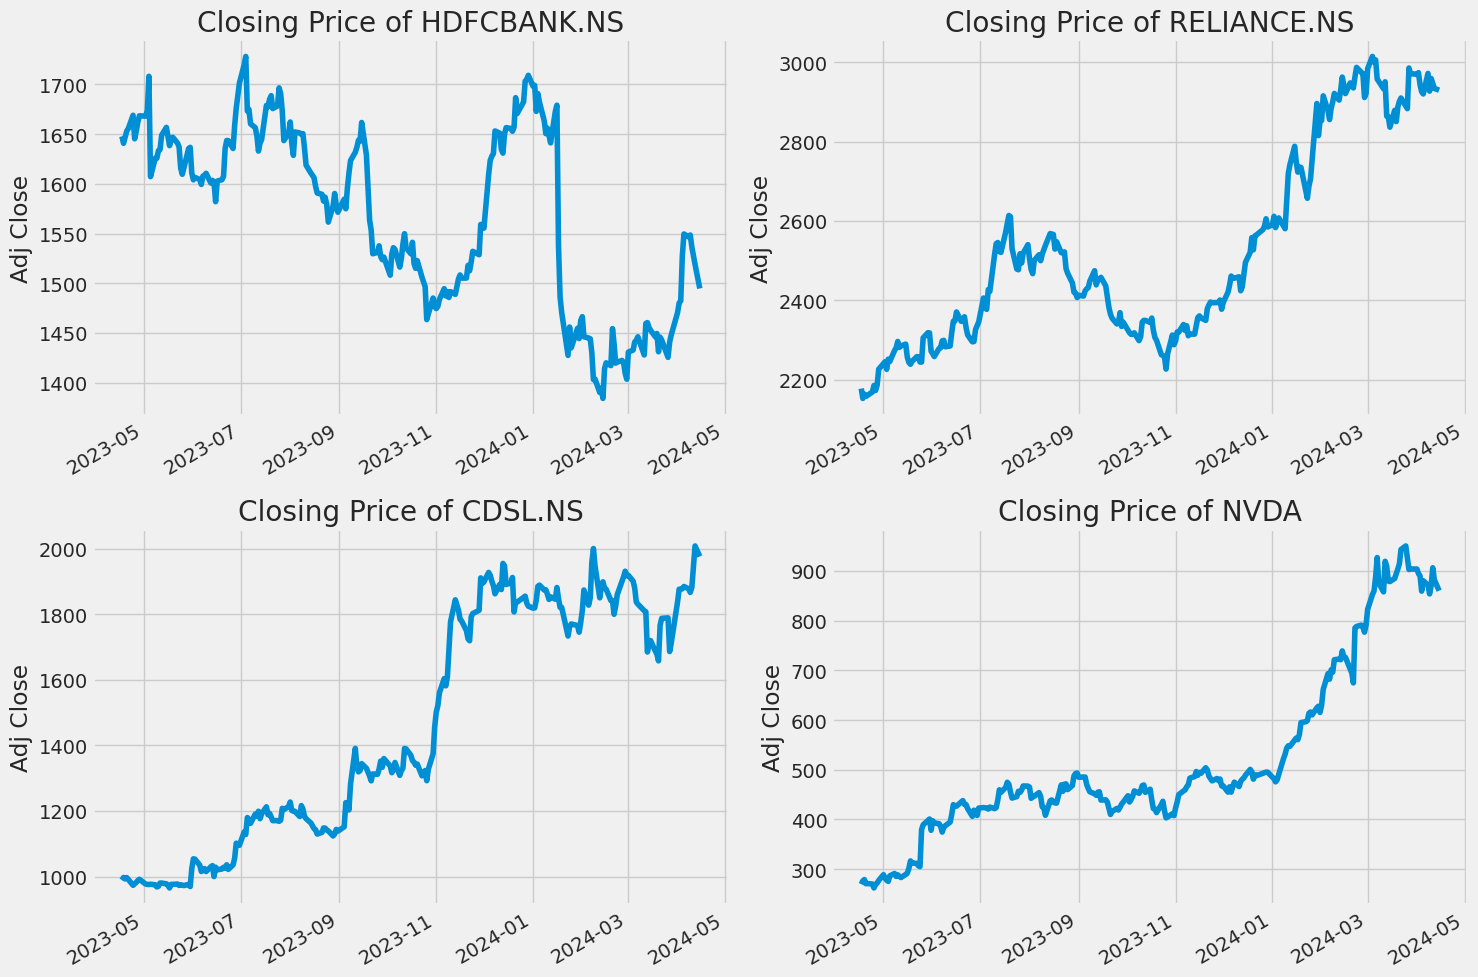

In [33]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

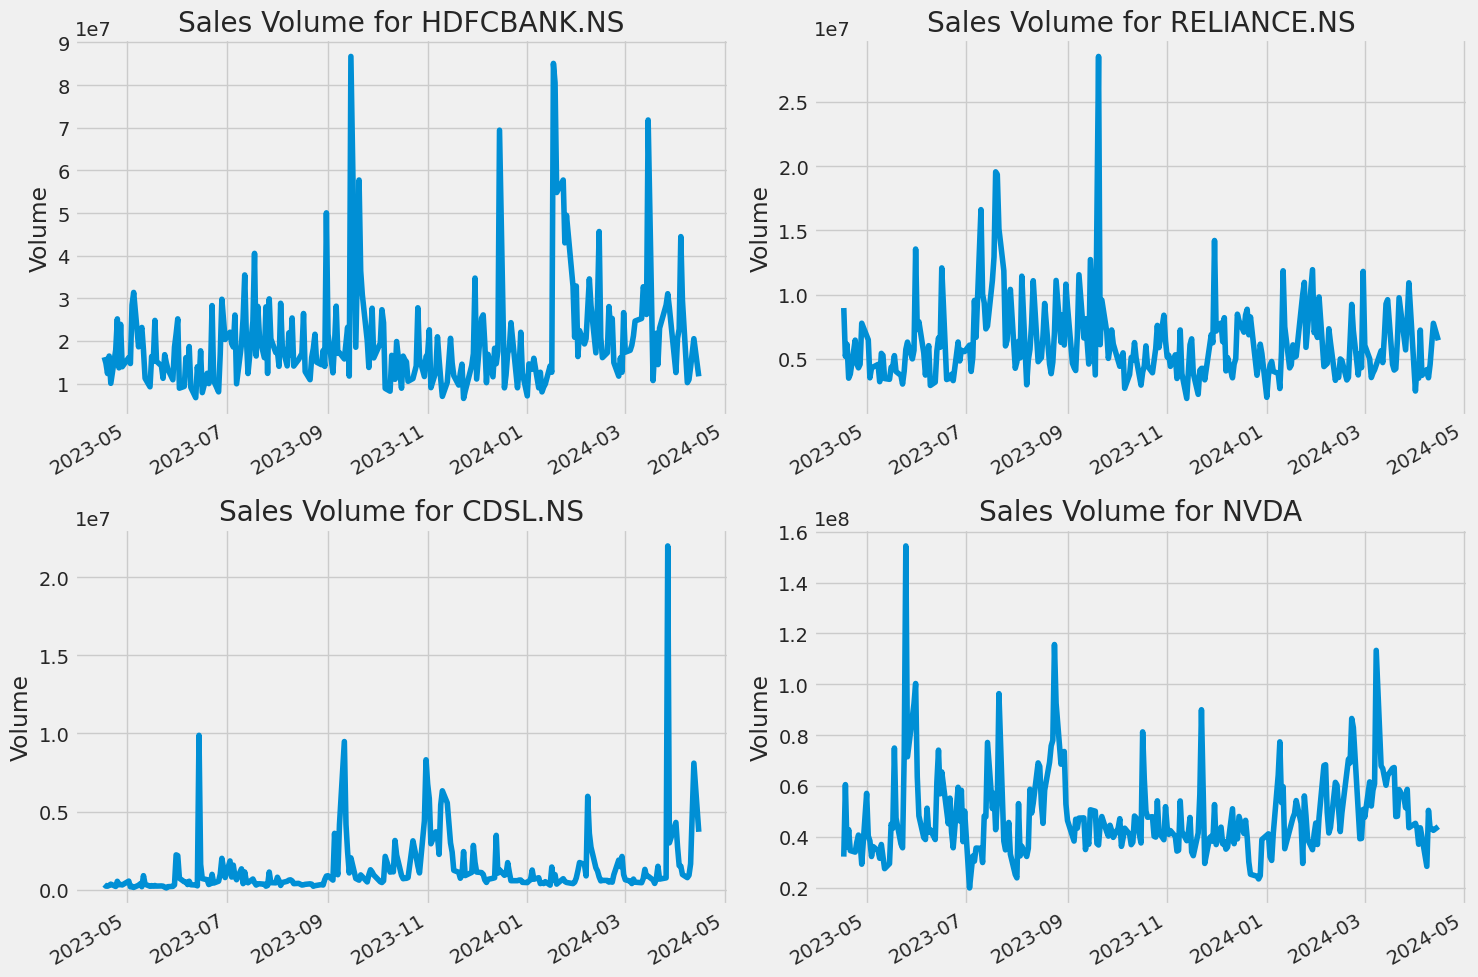

In [34]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

<ipython-input-36-e28b0af8fce5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
<ipython-input-36-e28b0af8fce5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
<ipython-input-36-e28b0af8fce5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

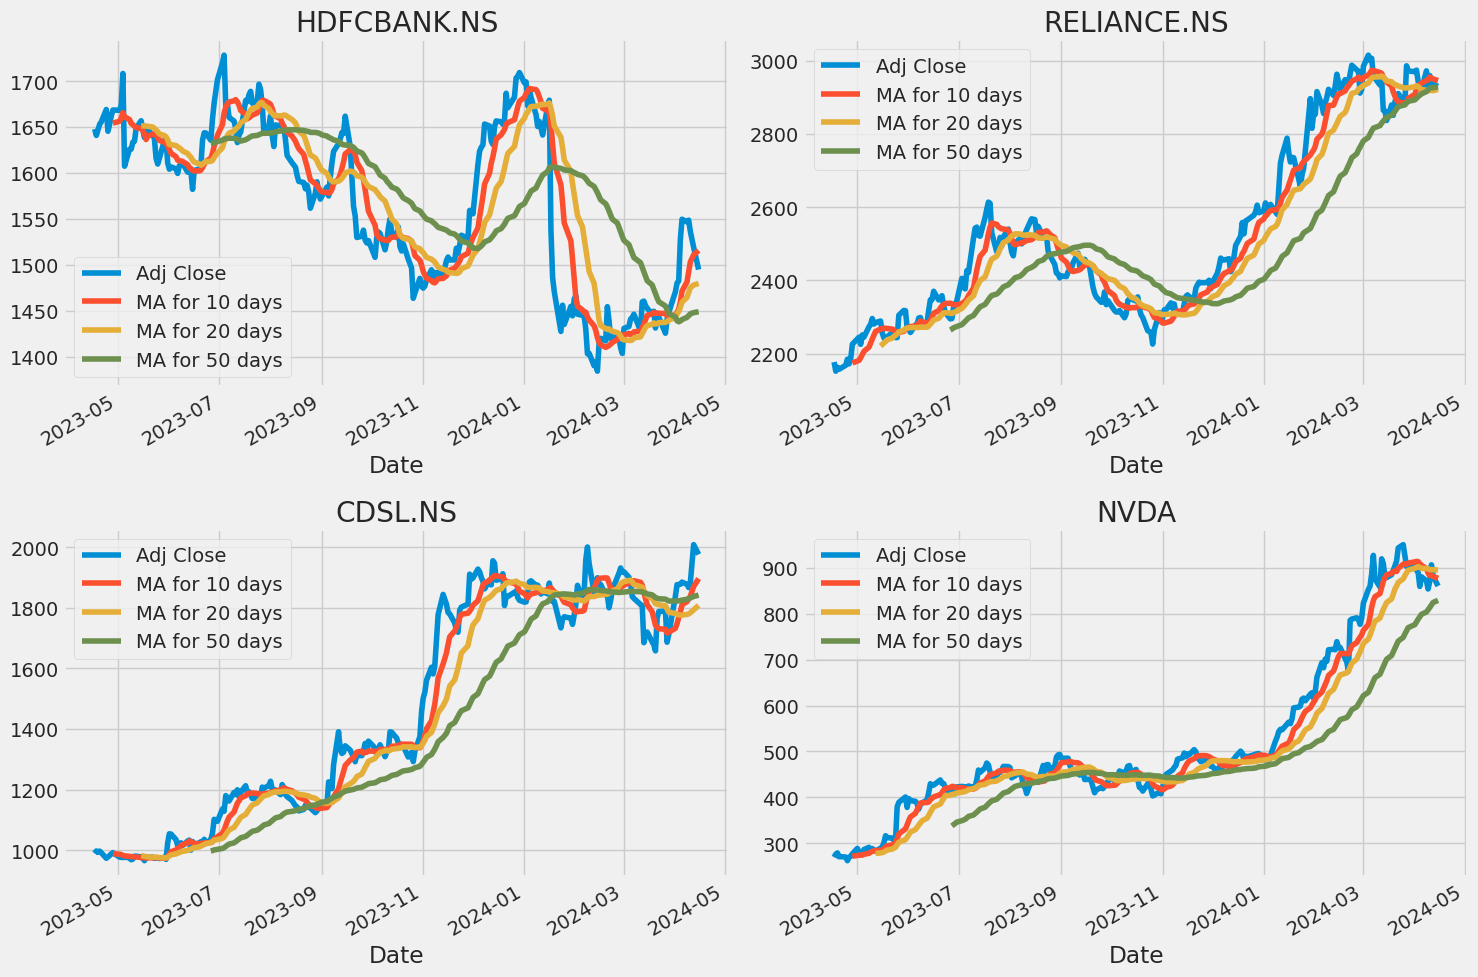

In [36]:
# Define the companies and their names
company_list = [df[df['company_name'] == 'HDFCBANK.NS'],
                df[df['company_name'] == 'RELIANCE.NS'],
                df[df['company_name'] == 'CDSL.NS'],
                df[df['company_name'] == 'NVDA']]

company_names = ['HDFCBANK.NS', 'RELIANCE.NS', 'CDSL.NS', 'NVDA']

# Calculate moving averages
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot data for each company
for ax, company, company_name in zip(axes.flatten(), company_list, company_names):
    company[['Adj Close', f'MA for 10 days', f'MA for 20 days', f'MA for 50 days']].plot(ax=ax)
    ax.set_title(company_name)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()


<ipython-input-38-7a01569f0dd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Adj Close'].pct_change()


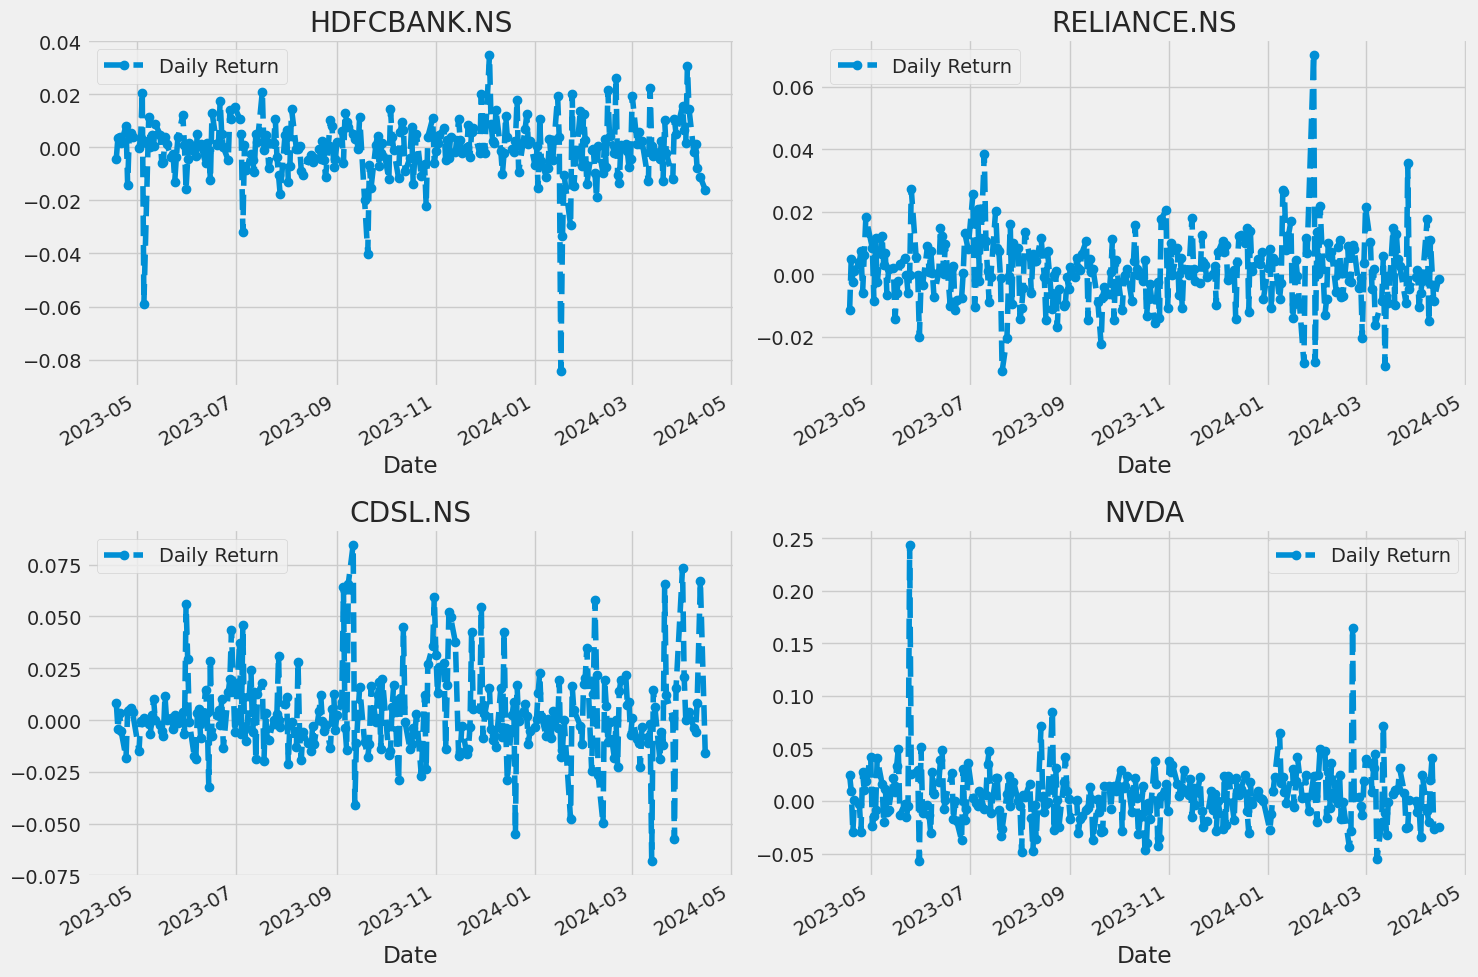

In [38]:
# Calculate daily returns for each company
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Define company names
company_names = ['HDFCBANK.NS', 'RELIANCE.NS', 'CDSL.NS', 'NVDA']

# Plot daily returns for each company
for ax, company, company_name in zip(axes.flatten(), company_list, company_names):
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(company_name)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()


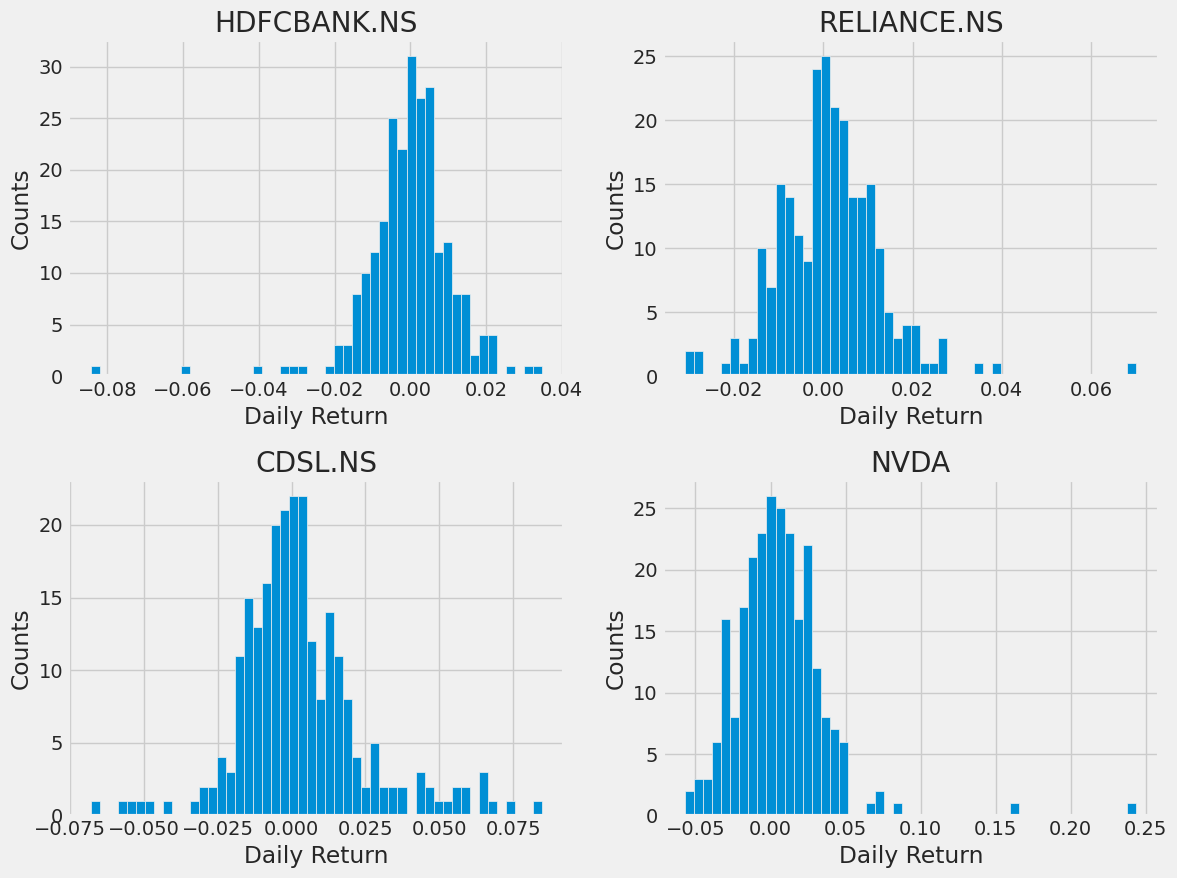

In [40]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

# Define company names
company_names = ['HDFCBANK.NS', 'RELIANCE.NS', 'CDSL.NS', 'NVDA']

# Plot histograms for each company's daily return
for i, (ax, company, company_name) in enumerate(zip(axes.flatten(), company_list, company_names)):
    company['Daily Return'].hist(bins=50, ax=ax)
    ax.set_xlabel('Daily Return')
    ax.set_ylabel('Counts')
    ax.set_title(company_name)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [43]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime

# Use yfinance to override the default pandas_datareader source
yf.pdr_override()

# Define the list of tech stocks
tech_list = ['HDFCBANK.NS', 'RELIANCE.NS', 'CDSL.NS', 'NVDA']

# Define the start and end dates for data retrieval
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Retrieve the adjusted close prices for the tech stocks
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Calculate the percentage change in adjusted close prices (daily returns)
tech_rets = closing_df.pct_change()

# Display the first few rows of the daily returns DataFrame
print(tech_rets.head())


[*********************100%%**********************]  4 of 4 completed

Ticker       CDSL.NS  HDFCBANK.NS      NVDA  RELIANCE.NS
Date                                                    
2023-04-17       NaN          NaN       NaN          NaN
2023-04-18  0.008074    -0.004230  0.024628    -0.011447
2023-04-19 -0.004103     0.003676  0.009542     0.004978
2023-04-20  0.003624     0.003722 -0.029609    -0.002530
2023-04-21 -0.005490     0.001615  0.000554     0.001257


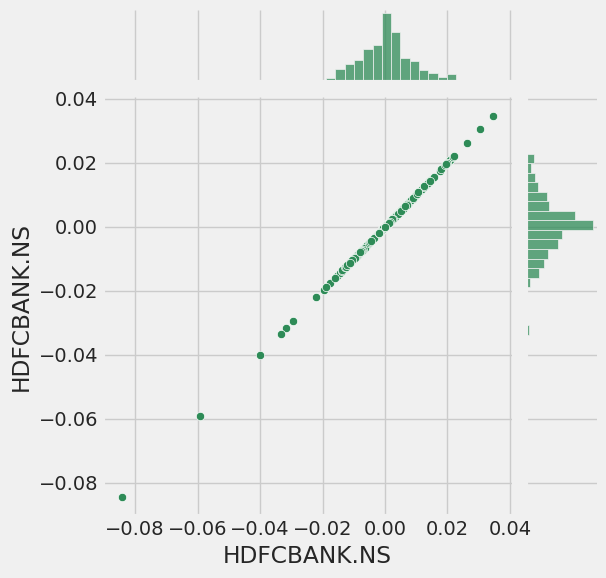

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a jointplot for HDFC's daily returns
sns.jointplot(x='HDFCBANK.NS', y='HDFCBANK.NS', data=tech_rets, kind='scatter', color='seagreen')

# Show the plot
plt.show()


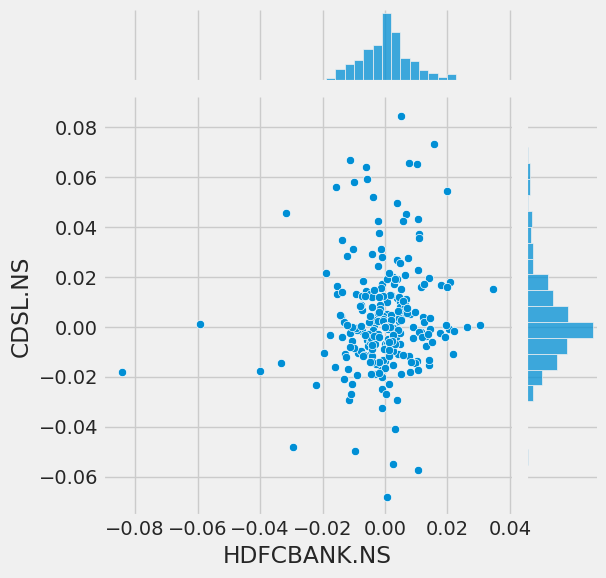

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a jointplot comparing the daily returns of HDFC and CDSL
sns.jointplot(x='HDFCBANK.NS', y='CDSL.NS', data=tech_rets, kind='scatter')

# Show the plot
plt.show()


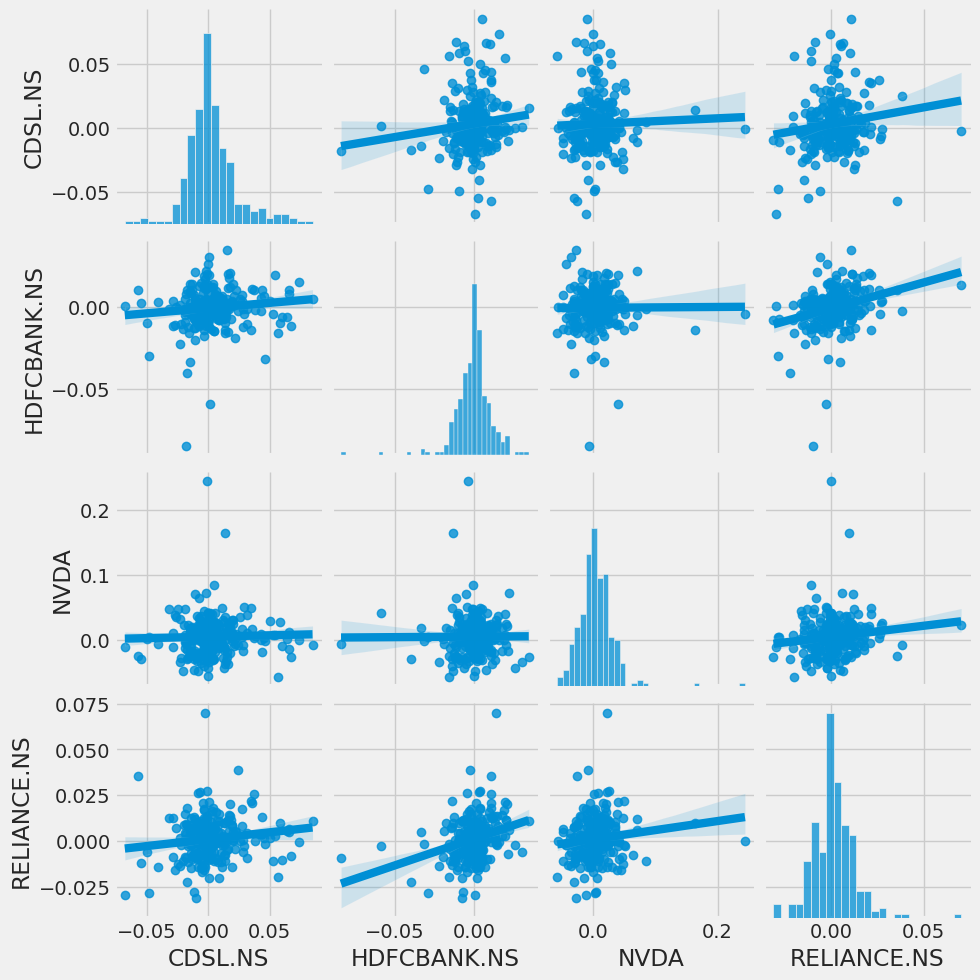

In [48]:
sns.pairplot(tech_rets, kind='reg')

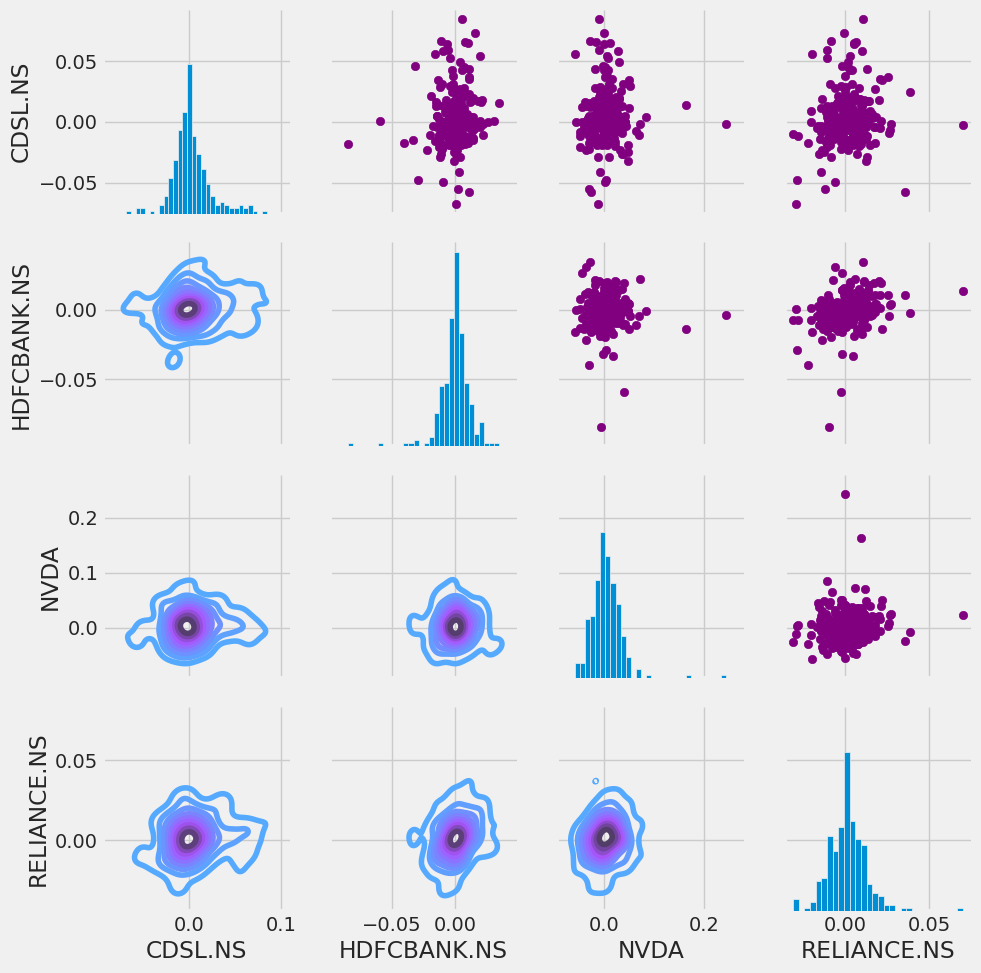

In [49]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

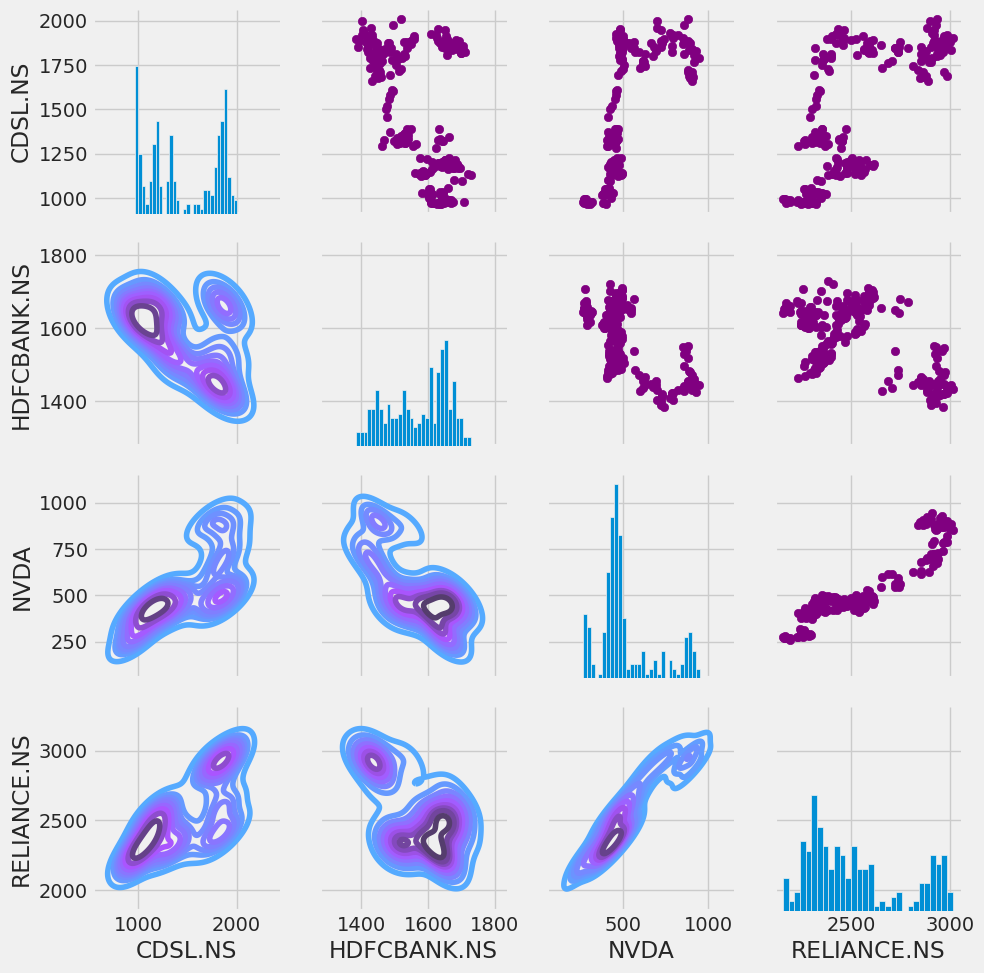

In [50]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

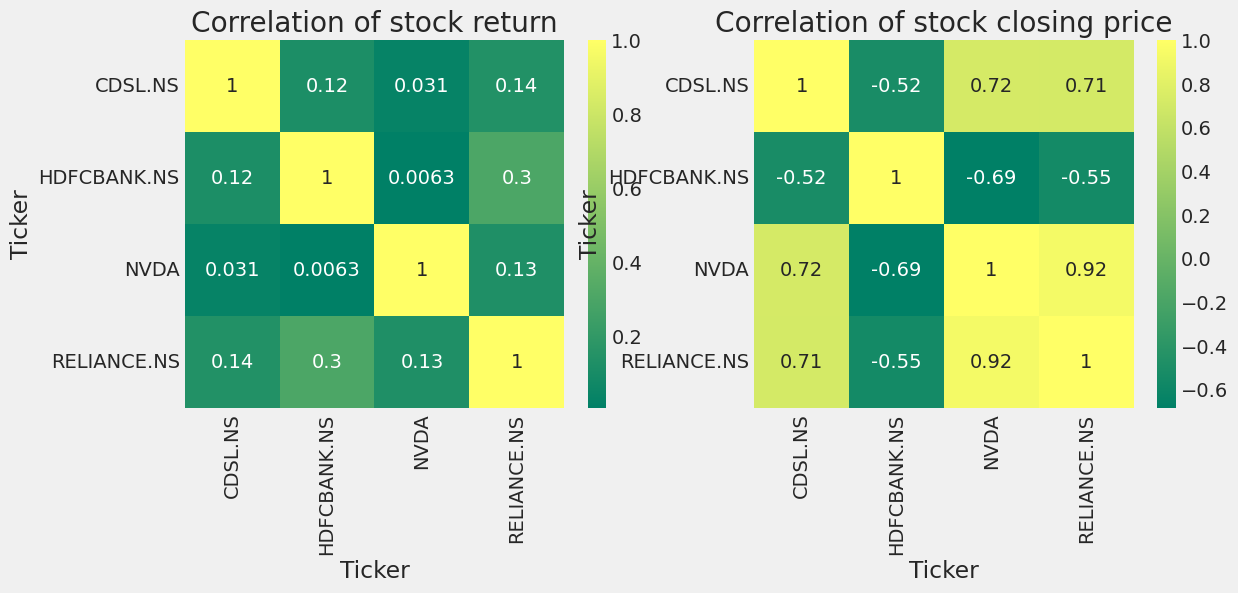

In [51]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

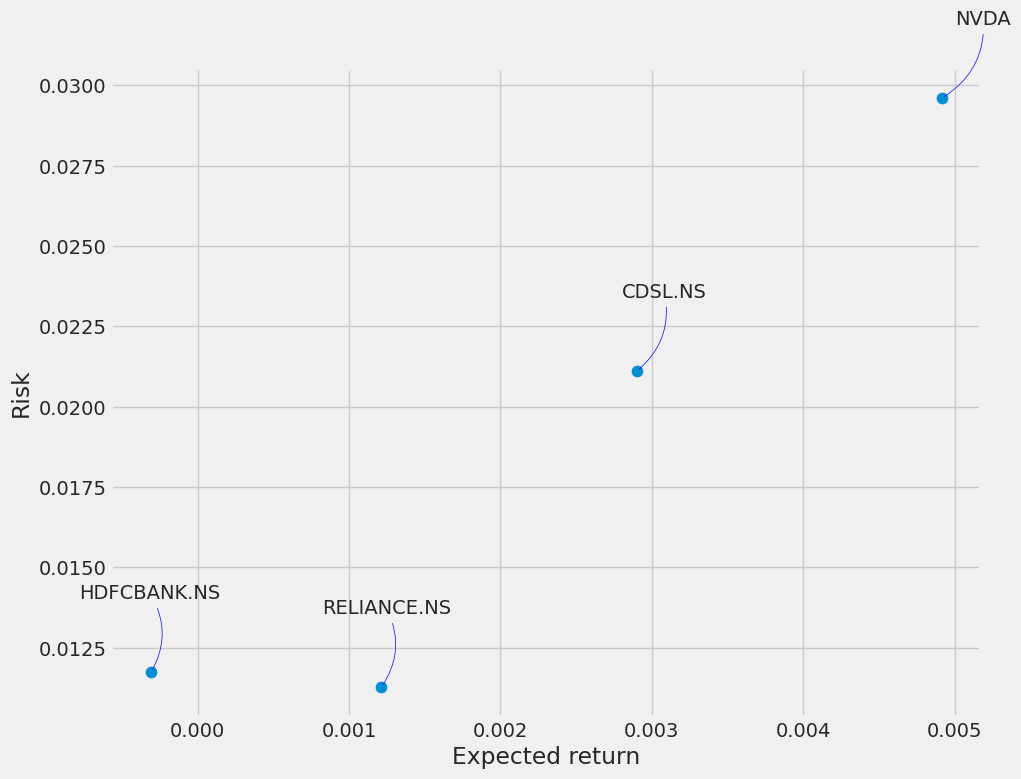

In [52]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [40]:
# Get the stock quote
df = pdr.get_data_yahoo('HDFCBANK.NS', start='2018-01-01', end=datetime.now())
# Show teh data
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,936.349976,940.375000,925.250000,927.250000,889.052185,3290258
2018-01-02,929.275024,937.500000,929.275024,936.174988,897.609497,2388158
2018-01-03,937.500000,939.125000,925.599976,926.325012,888.165283,2265644
2018-01-04,926.500000,932.750000,926.500000,929.950012,891.640991,1186888
2018-01-05,931.500000,934.025024,927.775024,931.799988,893.414734,1435434
...,...,...,...,...,...,...
2024-04-08,1554.949951,1557.250000,1541.550049,1546.599976,1546.599976,10241470
2024-04-09,1554.849976,1554.849976,1540.300049,1548.550049,1548.550049,10942247
2024-04-10,1549.900024,1549.900024,1532.949951,1536.349976,1536.349976,13903700


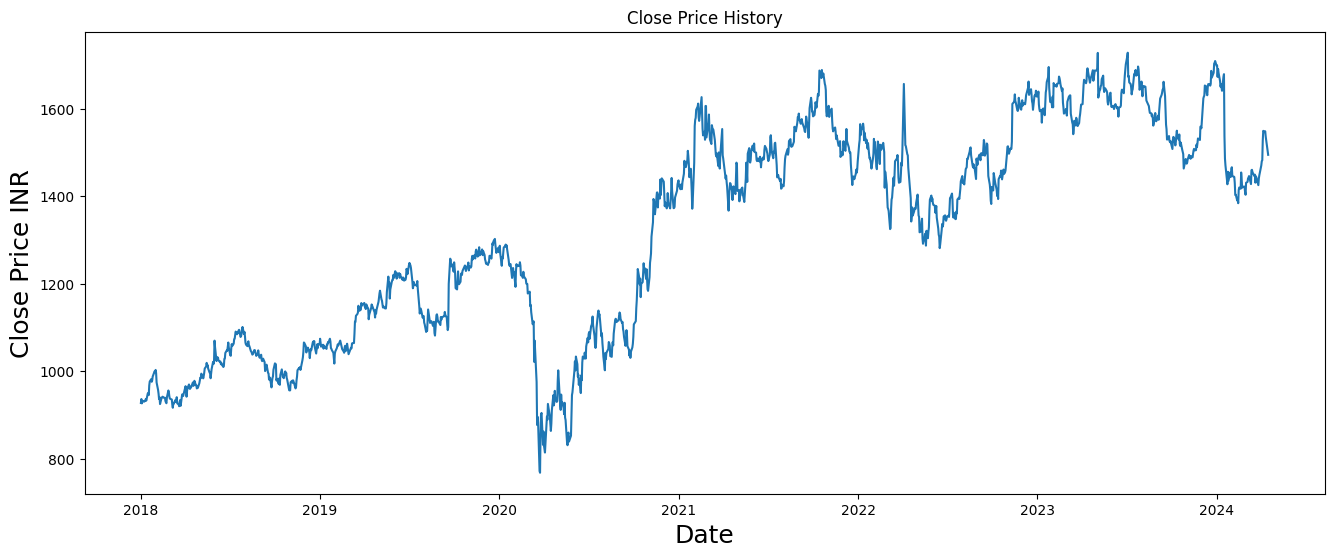

In [41]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [42]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1474

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.1661114 ],
       [0.17540342],
       [0.16514837],
       ...,
       [0.80026029],
       [0.7821447 ],
       [0.75689743]])

In [44]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.1661114 , 0.17540342, 0.16514837, 0.16892245, 0.1708485 ,
       0.16928682, 0.17090055, 0.17116083, 0.17550757, 0.1717335 ,
       0.18862572, 0.18987508, 0.18485164, 0.20765229, 0.2169703 ,
       0.22277459, 0.21650185, 0.21980741, 0.22881309, 0.24167102,
       0.23951067, 0.24482038, 0.23724624, 0.21478397, 0.19700675,
       0.18813121, 0.17563771, 0.17988024, 0.16350859, 0.17764186,
       0.18102552, 0.18037482, 0.17865694, 0.1784487 , 0.17064026,
       0.16762104, 0.16543464, 0.17967207, 0.1958095 , 0.19112444,
       0.18157207, 0.17644455, 0.17415406, 0.16181676, 0.15471107,
       0.16525246, 0.16431548, 0.17274857, 0.16910463, 0.17131702,
       0.17980221, 0.16533055, 0.16233732, 0.15830296, 0.16840188,
       0.17300885, 0.15937014, 0.18638727, 0.18594481, 0.18256115])]
[0.20603849656897255]

[array([0.1661114 , 0.17540342, 0.16514837, 0.16892245, 0.1708485 ,
       0.16928682, 0.17090055, 0.17116083, 0.17550757, 0.1717335 ,
       0.18862572, 0.18987508, 0.18

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
model = Sequential()
model.add(Dense(units=60, input_dim=60, activation='relu'))
model.add(Dense(units=1))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1414/1414 [==============================] - 79s 53ms/step - loss: 0.0037


In [46]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


3/3 [==============================] - 1s 34ms/step


54.46432933413558

<ipython-input-47-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


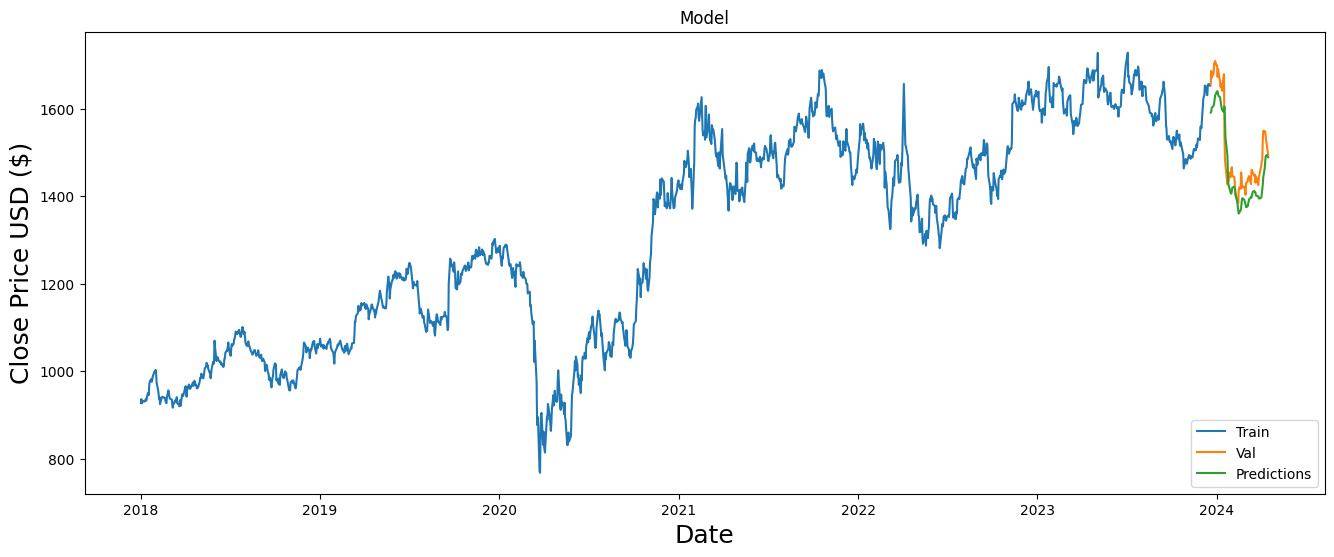

In [47]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [39]:
valid

,Close,Predictions
Date,,
2023-10-26,1463.400024,1526.021851
2023-10-27,1469.150024,1514.835938
2023-10-30,1485.099976,1504.842529
2023-10-31,1476.500000,1499.605225
2023-11-01,1474.500000,1495.514648
...,...,...
2024-04-08,1546.599976,1504.845581
2024-04-09,1548.550049,1520.216064
2024-04-10,1536.349976,1532.454346
